In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.csv',error_bad_lines=False, encoding='ISO-8859-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

# 1. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three colums
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns={'v1':'target', 'v2':'Text'}, inplace=True)

In [9]:
data.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [11]:
data.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# check for null values
data.isnull().sum()

target    0
Text      0
dtype: int64

In [13]:
# check for duplicates
data.duplicated().sum()

403

In [14]:
# remove duplicates by keep the first one only
data.drop_duplicates(keep='first', inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

In [17]:
data['Text'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [18]:
data['Text'][40]

'Pls go ahead with watts. I just wanted to be sure. Do have a great weekend. Abiola'

# 2.EDA

In [19]:
# Check if data is balanced or not
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

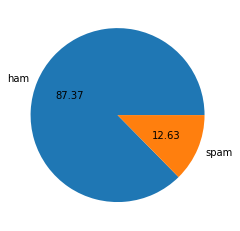

In [20]:
plt.pie(data['target'].value_counts(),labels =['ham', 'spam'], autopct='%0.2f');

In [21]:
# Adding column no.of charcaters in the sentence
data['total_char'] = data['Text'].apply(len)

In [22]:
data.head()

,target,Text,total_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
# Total no of words
data['total_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data.head()

,target,Text,total_char,total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# Total no of sentence
data['total_sentence'] = data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,Text,total_char,total_words,total_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data[['total_char', 'total_words', 'total_sentence']].describe()

,total_char,total_words,total_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# For Spam as target
data[data['target']==1][['total_char', 'total_words', 'total_sentence']].describe()

,total_char,total_words,total_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
# For Ham as target
data[data['target']==0][['total_char', 'total_words', 'total_sentence']].describe()

,total_char,total_words,total_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


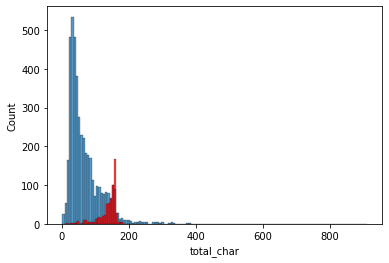

In [31]:
import seaborn as sns

#Histogram for no. of characters in text
sns.histplot(data[data['target']==0]['total_char'])
sns.histplot(data[data['target']==1]['total_char'],color='red')

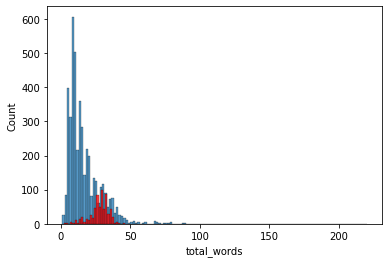

In [32]:
#Histogram for no. of words in text
sns.histplot(data[data['target']==0]['total_words'])
sns.histplot(data[data['target']==1]['total_words'],color='red')

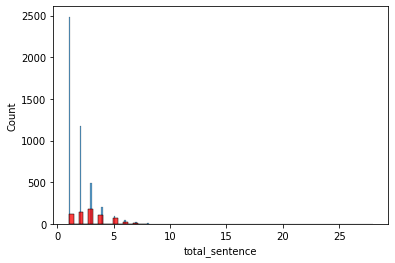

In [33]:
#Histogram for no. of sentence in text
sns.histplot(data[data['target']==0]['total_sentence'])
sns.histplot(data[data['target']==1]['total_sentence'],color='red')

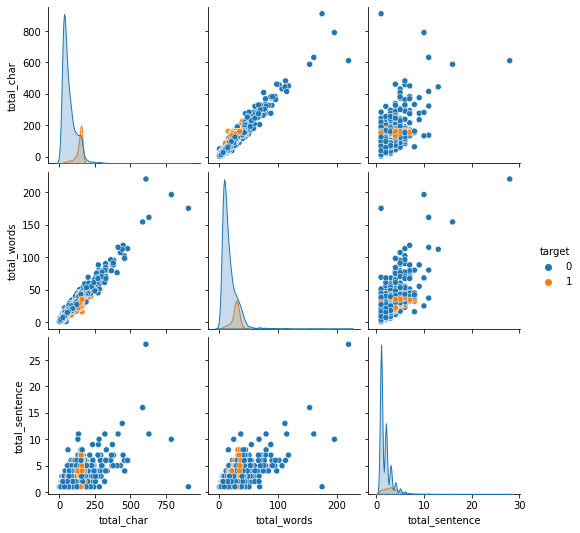

In [34]:
sns.pairplot(data, hue='target')

In [35]:
data.corr()

,target,total_char,total_words,total_sentence
target,1.000000,0.384717,0.262984,0.284901
total_char,0.384717,1.000000,0.965770,0.638143
total_words,0.262984,0.965770,1.000000,0.684541
total_sentence,0.284901,0.638143,0.684541,1.000000


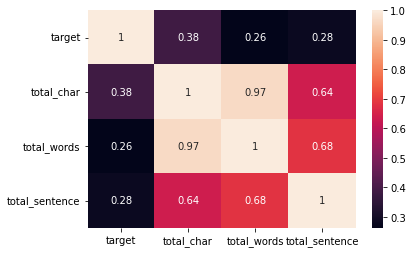

In [36]:
sns.heatmap(data.corr(), annot=True)

# 3. Text Preprocessing


In [37]:
# LowerCase
# Tokenization
# Removing Special characters
# Remove Punctuation and stopwords
# Stemming

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
def text_preprocess(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  new_text = []
  for i in text:
    if i.isalnum():
      new_text.append(i)
    
  text = new_text.copy()
  new_text.clear()
  
  for i in text:
    if (i not in stopwords.words('english')) and (i not in string.punctuation):
      new_text.append(i)
  
  text = new_text.copy()
  new_text.clear()

  for i in text:
    new_text.append(ps.stem(i))

  return " ".join(new_text)

In [40]:
text_preprocess('Hey buddy are you up for 20% profit tod@y in dancing videos?')

'hey buddi 20 profit tod danc video'

In [41]:
data['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
text_preprocess(data['Text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
data['transformed_text'] = data['Text'].apply(text_preprocess)

In [44]:
data.head()

,target,Text,total_char,total_words,total_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
# Word cloud for Spam
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=12, background_color='white')
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

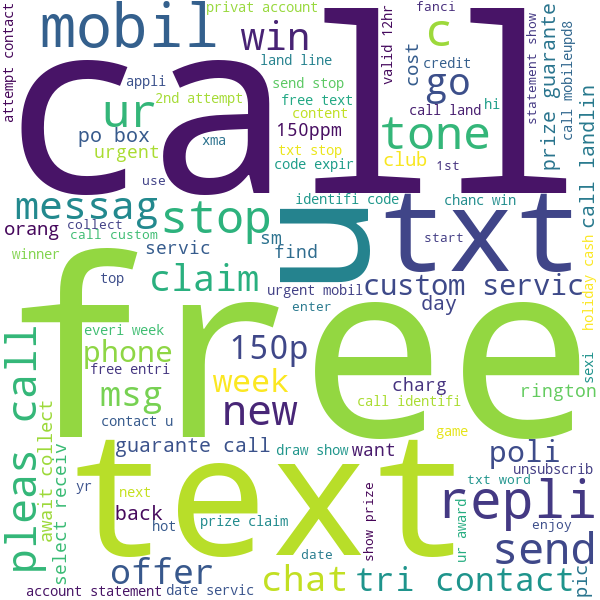

In [46]:
spam_wc.to_image()

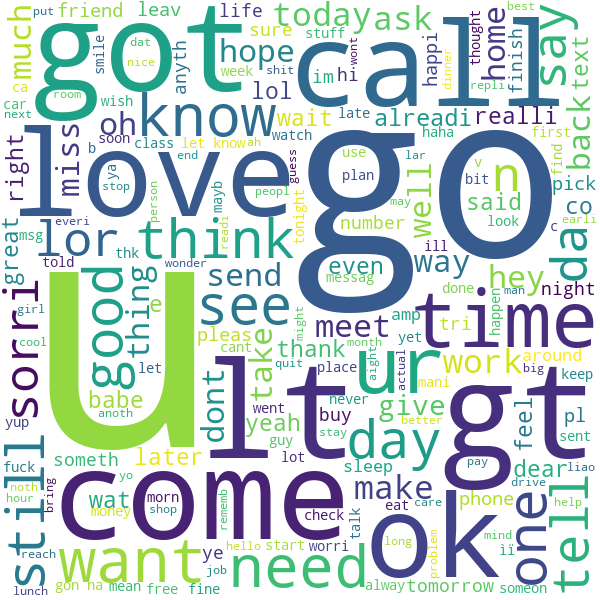

In [47]:
# Word cloud for Ham
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=12, background_color='white')
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
ham_wc.to_image()

In [48]:
# Find top50 words in Spam
spam_corpus = []

for msg in data[data['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

In [50]:
from collections import Counter
most_common = pd.DataFrame(Counter(spam_corpus).most_common(50))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


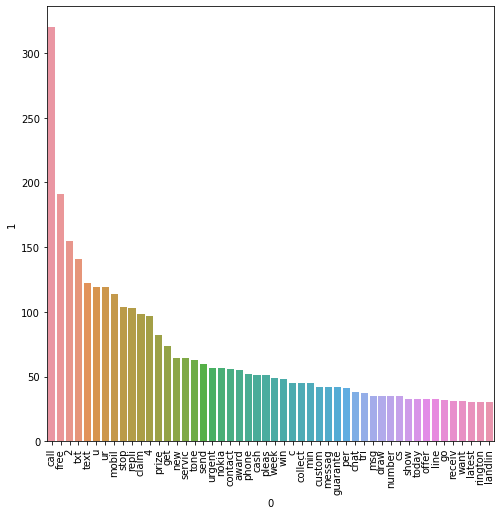

In [51]:
plt.figure(figsize=(8,8))
sns.barplot(most_common[0], most_common[1])
plt.xticks(rotation=90);

In [52]:
# Find top50 words in Ham
ham_corpus = []

for msg in data[data['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [53]:
len(ham_corpus)

35394

In [54]:
from collections import Counter
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(50))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


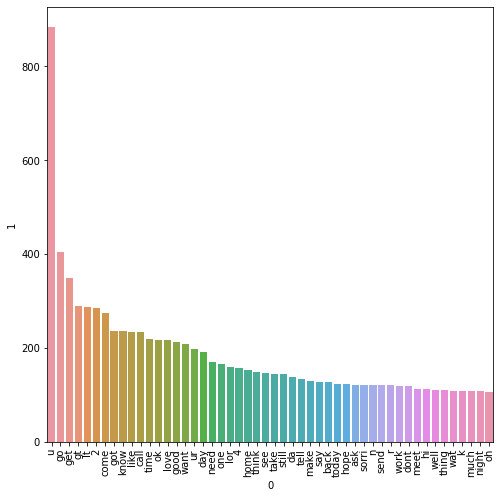

In [55]:
plt.figure(figsize=(8,8))
sns.barplot(most_common_ham[0], most_common_ham[1])
plt.xticks(rotation=90);

#4. Model Building

In [56]:
data.head()

,target,Text,total_char,total_words,total_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Bag Of Words

In [57]:
# Vectorize the data using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['transformed_text']).toarray()

In [58]:
X.shape

(5169, 6708)

In [59]:
y = data['target'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=48)

In [61]:
# NavieBayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8626692456479691
[[784 118]
 [ 24 108]]
0.4778761061946903


In [63]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9671179883945842
[[878  24]
 [ 10 122]]
0.8356164383561644


In [64]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9632495164410058
[[897   5]
 [ 33  99]]
0.9519230769230769


# TfIdf

In [65]:
# using TfIDf vectorizer
# Here we can restrict max_features as well
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [66]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [67]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=48)

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8597678916827853
[[785 117]
 [ 28 104]]
0.47058823529411764


In [70]:
# Have best Precision Score with tfidf
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9526112185686654
[[902   0]
 [ 49  83]]
1.0


In [71]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9632495164410058
[[897   5]
 [ 33  99]]
0.9519230769230769


Checking for Multiple Models

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc=SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
adb = AdaBoostClassifier()
bgc = BaggingClassifier()
gbc = GradientBoostingClassifier()

In [76]:
models = {
    'LR' : lr,
    'SVC' : svc,
    'KNN' : knn,
    'RF' : rf,
    'XGB' : xgb,
    'ADB' : adb,
    'BGC' : bgc,
    'GBC' : gbc
}

In [75]:
def train_model(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [79]:
accuracy_scores = []
precision_scores=[]

for model_name, model in models.items():
  accuracy, precision = train_model(model)
  print("model", model_name, "have accuracy", accuracy, "and Precision score", precision)
  


model LR have accuracy 0.9390715667311412 and Precision score 0.9859154929577465
model SVC have accuracy 0.9564796905222437 and Precision score 0.9887640449438202
model KNN have accuracy 0.9003868471953579 and Precision score 1.0
model RF have accuracy 0.9622823984526112 and Precision score 0.9894736842105263
model XGB have accuracy 0.9506769825918762 and Precision score 0.9175257731958762
model ADB have accuracy 0.960348162475822 and Precision score 0.9252336448598131
model BGC have accuracy 0.9439071566731141 and Precision score 0.8135593220338984
model GBC have accuracy 0.9526112185686654 and Precision score 0.9368421052631579


Dump Models using Pickle

In [80]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))